In [1]:
import compiam
from compiam.melody.tonic_identification import TonicIndianMultiPitch
from compiam.rhythm.meter import AksharaPulseTracker
from compiam import load_dataset, load_corpora, load_model
import matplotlib.pyplot as plt
import os
import numpy as np
import IPython.display as ipd
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
import librosa
import librosa.display
import random
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow_addons.image import sparse_image_warp

C:\Users\adith\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
int(np.ceil(5*44100/128))

1723

In [3]:
# class SpecAugment():
#     '''
#     Augmentation Parameters for policies
#     -----------------------------------------
#     Policy | W  | F  | m_F |  T  |  p  | m_T
#     -----------------------------------------
#     None   |  0 |  0 |  -  |  0  |  -  |  -
#     -----------------------------------------
#     LB     | 80 | 27 |  1  | 100 | 1.0 | 1
#     -----------------------------------------
#     LD     | 80 | 27 |  2  | 100 | 1.0 | 2
#     -----------------------------------------
#     SM     | 40 | 15 |  2  |  70 | 0.2 | 2
#     -----------------------------------------
#     SS     | 40 | 27 |  2  |  70 | 0.2 | 2
#     -----------------------------------------
    
#     LB  : LibriSpeech basic
#     LD  : LibriSpeech double
#     SM  : Switchboard mild
#     SS  : Switchboard strong
#     W   : Time Warp parameter
#     F   : Frequency Mask parameter
#     m_F : Number of Frequency masks
#     T   : Time Mask parameter
#     p   : Parameter for calculating upper bound for time mask
#     m_T : Number of time masks
#     '''
    
#     def __init__(self, mel_spectrogram, policy, zero_mean_normalized=True):
#         self.mel_spectrogram = mel_spectrogram
#         self.policy = policy
#         self.zero_mean_normalized = zero_mean_normalized
        
#         # Policy Specific Parameters
#         if self.policy == 'LB':
#             self.W, self.F, self.m_F, self.T, self.p, self.m_T = 80, 27, 1, 100, 1.0, 1
#         elif self.policy == 'LD':
#             self.W, self.F, self.m_F, self.T, self.p, self.m_T = 80, 27, 2, 100, 1.0, 2
#         elif self.policy == 'SM':
#             self.W, self.F, self.m_F, self.T, self.p, self.m_T = 40, 15, 2, 70, 0.2, 2
#         elif self.policy == 'SS':
#             self.W, self.F, self.m_F, self.T, self.p, self.m_T = 40, 27, 2, 70, 0.2, 2
        
        
#     def time_warp(self):
    
#         # Reshape to [Batch_size, time, freq, 1] for sparse_image_warp func.
#         self.mel_spectrogram = np.reshape(self.mel_spectrogram, (-1, self.mel_spectrogram.shape[0], self.mel_spectrogram.shape[1], 1))
        
#         v, tau = self.mel_spectrogram.shape[1], self.mel_spectrogram.shape[2]
        
#         horiz_line_thru_ctr = self.mel_spectrogram[0][v//2]
    
#         random_pt = horiz_line_thru_ctr[random.randrange(self.W, tau - self.W)] # random point along the horizontal/time axis
#         w = np.random.uniform((-self.W), self.W) # distance
        
#         # Source Points
#         src_points = [[[v//2, random_pt[0]]]]
        
#         # Destination Points
#         dest_points = [[[v//2, random_pt[0] + w]]]
        
#         self.mel_spectrogram, _ = sparse_image_warp(self.mel_spectrogram, src_points, dest_points, num_boundary_points=2)
    
#         return self.mel_spectrogram
    
    
#     def freq_mask(self):
        
#         v = self.mel_spectrogram.shape[1] # no. of mel bins
        
#         # apply m_F frequency masks to the mel spectrogram
#         for i in range(self.m_F):
#             f = int(np.random.uniform(0, self.F)) # [0, F)
#             f0 = random.randint(0, v - f) # [0, v - f)
#             self.mel_spectrogram[f0:f0 + f, :] = 0
            
#         return self.mel_spectrogram
    
    
#     def time_mask(self):
    
#         tau = self.mel_spectrogram.shape[2] # time frames
        
#         # apply m_T time masks to the mel spectrogram
#         for i in range(self.m_T):
#             t = int(np.random.uniform(0, self.T)) # [0, T)
#             t0 = random.randint(0, tau - t) # [0, tau - t)
#             self.mel_spectrogram[:, :, t0:t0 + t, :] = 0
            
#         return self.mel_spectrogram
    

    
    
    
class SpecAugmentModified():
    '''
    Augmentation Parameters for policies
    -----------------------------------------
    Policy | W  | F  | m_F |  T  |  p  | m_T
    -----------------------------------------
    None   |  0 |  0 |  -  |  0  |  -  |  -
    -----------------------------------------
    LB     | 80 | 27 |  1  | 100 | 1.0 | 1
    -----------------------------------------
    LD     | 80 | 27 |  2  | 100 | 1.0 | 2
    -----------------------------------------
    SM     | 40 | 15 |  2  |  70 | 0.2 | 2
    -----------------------------------------
    SS     | 40 | 27 |  2  |  70 | 0.2 | 2
    -----------------------------------------
    
    LB  : LibriSpeech basic
    LD  : LibriSpeech double
    SM  : Switchboard mild
    SS  : Switchboard strong
    W   : Time Warp parameter
    F   : Frequency Mask parameter
    m_F : Number of Frequency masks
    T   : Time Mask parameter
    p   : Parameter for calculating upper bound for time mask
    m_T : Number of time masks
    '''
    
    def __init__(self, mel_spectrogram, policy, zero_mean_normalized=True):
        self.mel_spectrogram = mel_spectrogram
        self.policy = policy
        self.zero_mean_normalized = zero_mean_normalized
        
        # Policy Specific Parameters
        if self.policy == 'LB':
            self.W, self.F, self.m_F, self.T, self.p, self.m_T = 80, 27, 1, 100, 1.0, 1
        elif self.policy == 'LD':
            self.W, self.F, self.m_F, self.T, self.p, self.m_T = 80, 27, 2, 100, 1.0, 2
        elif self.policy == 'SM':
            self.W, self.F, self.m_F, self.T, self.p, self.m_T = 40, 15, 2, 70, 0.2, 2
        elif self.policy == 'SS':
            self.W, self.F, self.m_F, self.T, self.p, self.m_T = 40, 27, 2, 70, 0.2, 2
        
        
    def time_warp(self):
    
        # Reshape to [Batch_size, time, freq, 1] for sparse_image_warp func.
        self.mel_spectrogram = np.reshape(self.mel_spectrogram, (-1, self.mel_spectrogram.shape[0], self.mel_spectrogram.shape[1], 1))
        
        v, tau = self.mel_spectrogram.shape[1], self.mel_spectrogram.shape[2]
        
        horiz_line_thru_ctr = self.mel_spectrogram[0][v//2]
    
        random_pt = horiz_line_thru_ctr[random.randrange(self.W, tau - self.W)] # random point along the horizontal/time axis
        w = np.random.uniform((-self.W), self.W) # distance
        
        # Source Points
        src_points = [[[v//2, random_pt[0]]]]
        
        # Destination Points
        dest_points = [[[v//2, random_pt[0] + w]]]
        
        self.mel_spectrogram, _ = sparse_image_warp(self.mel_spectrogram, src_points, dest_points, num_boundary_points=2)
    
        return self.mel_spectrogram
    
    
    def freq_mask(self, frames_list):
        
        v = self.mel_spectrogram.shape[1] # no. of mel bins
        
        # apply m_F frequency masks to the mel spectrogram
        for i in range(self.m_F):
            f = int(np.random.uniform(0, self.F)) # [0, F)
            f0 = random.randint(0, v - f) # [0, v - f)
            
            for limits in frames_list:
                self.mel_spectrogram[f0:f0+f, limits[0]:min(v, limits[1])] = 0
#             self.mel_spectrogram[f0:f0 + f, :] = 0
            
        return self.mel_spectrogram
    
    
    def time_mask(self):
    
        tau = self.mel_spectrogram.shape[2] # time frames
        
        # apply m_T time masks to the mel spectrogram
        for i in range(self.m_T):
            t = int(np.random.uniform(0, self.T)) # [0, T)
            t0 = random.randint(0, tau - t) # [0, tau - t)
            self.mel_spectrogram[:, :, t0:t0 + t, :] = 0
            
        return self.mel_spectrogram

In [4]:
data_home = r'D:\UGP'

In [5]:
mridangam_stroke = compiam.load_dataset("mridangam_stroke",  data_home=data_home)
mridangam_stroke.download()
mridangam_stroke.validate()

100%|████████████████████████████████████████████████████████████████████████████| 6976/6976 [00:01<00:00, 5052.67it/s]


({'tracks': {}}, {'tracks': {}})

In [6]:
mridangam_tracks = mridangam_stroke.load_tracks()

In [7]:
lens = [len(mridangam_tracks[name].audio[0]) for name in list(mridangam_tracks.keys())]

In [8]:
tmp = lens

In [9]:
tmp.sort()

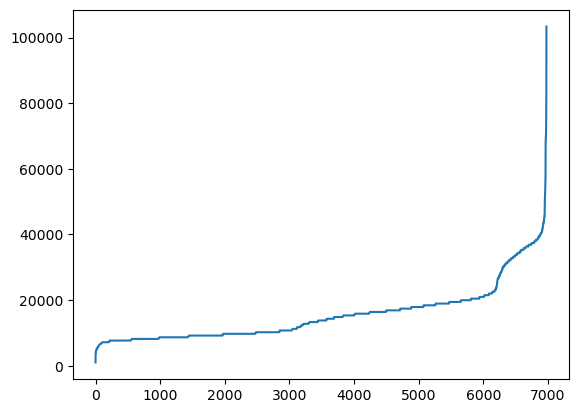

In [10]:
plt.plot(tmp)

(array([3.112e+03, 2.901e+03, 3.580e+02, 5.420e+02, 4.100e+01, 8.000e+00,
        9.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([  1014. ,  11249.6,  21485.2,  31720.8,  41956.4,  52192. ,
         62427.6,  72663.2,  82898.8,  93134.4, 103370. ]),
 <BarContainer object of 10 artists>)

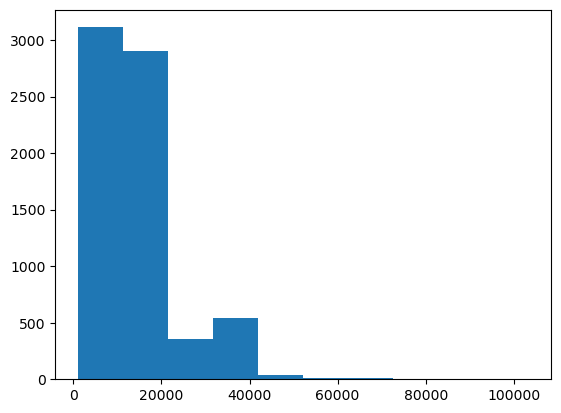

In [11]:
plt.hist(tmp)

In [12]:
mridangam_stroke.cite

<bound method Dataset.cite of The mridangam_stroke dataset
----------------------------------------------------------------------------------------------------


Call the .cite method for bibtex citations.
----------------------------------------------------------------------------------------------------


Mridangam Stroke track class

    Args:
        track_id (str): track id of the track
        data_home (str): Local path where the dataset is stored.

    Attributes:
        track_id (str): track id
        audio_path (str): audio path
        stroke_name (str): name of the Mridangam stroke present in Track
        tonic (str): tonic of the stroke in the Track

    ----------------------------------------------------------------------------------------------------
>

In [13]:
np.sum([1 if ele>=44100 else 0 for ele in tmp])

39

In [14]:
len(tmp)

6976

In [15]:
notes, strokes = [], []
for name in list(mridangam_tracks.keys()):
    if mridangam_tracks[name].tonic not in notes:
        notes.append(mridangam_tracks[name].tonic)
    if mridangam_tracks[name].stroke_name not in strokes:
        strokes.append(mridangam_tracks[name].stroke_name)

In [16]:
notes, strokes

(['B', 'C', 'C#', 'D', 'D#', 'E'],
 ['bheem', 'cha', 'dheem', 'dhin', 'num', 'ta', 'tha', 'tham', 'thi', 'thom'])

In [17]:
class_matrix = {note:{stroke:0 for stroke in strokes} for note in notes}

In [18]:
for name in list(mridangam_tracks.keys()):
    class_matrix[mridangam_tracks[name].tonic][mridangam_tracks[name].stroke_name] += 1

In [19]:
print(class_matrix)

{'B': {'bheem': 5, 'cha': 55, 'dheem': 114, 'dhin': 44, 'num': 72, 'ta': 145, 'tha': 198, 'tham': 87, 'thi': 432, 'thom': 130}, 'C': {'bheem': 3, 'cha': 50, 'dheem': 86, 'dhin': 43, 'num': 95, 'ta': 165, 'tha': 184, 'tham': 73, 'thi': 325, 'thom': 79}, 'C#': {'bheem': 1, 'cha': 52, 'dheem': 73, 'dhin': 58, 'num': 95, 'ta': 215, 'tha': 204, 'tham': 32, 'thi': 353, 'thom': 68}, 'D': {'bheem': 0, 'cha': 61, 'dheem': 12, 'dhin': 12, 'num': 18, 'ta': 177, 'tha': 212, 'tham': 24, 'thi': 275, 'thom': 89}, 'D#': {'bheem': 15, 'cha': 48, 'dheem': 110, 'dhin': 196, 'num': 143, 'ta': 116, 'tha': 194, 'tham': 91, 'thi': 435, 'thom': 115}, 'E': {'bheem': 25, 'cha': 53, 'dheem': 54, 'dhin': 113, 'num': 59, 'ta': 105, 'tha': 159, 'tham': 50, 'thi': 344, 'thom': 135}}


In [20]:
for stroke in strokes:
    tot = 0
    for note in notes:
        tot += class_matrix[note][stroke]
    print(stroke, tot)

bheem 49
cha 319
dheem 449
dhin 466
num 482
ta 923
tha 1151
tham 357
thi 2164
thom 616


In [21]:
def make_spectrogram(audio):
    return librosa.power_to_db(librosa.feature.melspectrogram(y=librosa.util.normalize(audio),n_fft=4096, 
                                                              sr=44100,win_length=256, n_mels=128, hop_length=128,
                                                                window='hann', fmax=8000), ref=np.max)

In [22]:
def play(name):
    print(f"tonic - {mridangam_tracks[name].tonic}, stroke - {mridangam_tracks[name].stroke_name}")
    return ipd.Audio(mridangam_tracks[name].audio[0], rate = 44100)

In [23]:
classwise = {note:{stroke:[] for stroke in strokes} for note in notes}
for name in list(mridangam_tracks.keys()):
    classwise[mridangam_tracks[name].tonic][mridangam_tracks[name].stroke_name].append(name)
classwise

{'B': {'bheem': ['224030', '224031', '224032', '224033', '224034'],
  'cha': ['224035',
   '224036',
   '224037',
   '224038',
   '224039',
   '224040',
   '224041',
   '224042',
   '224043',
   '224044',
   '224045',
   '224046',
   '224047',
   '224048',
   '224049',
   '224050',
   '224051',
   '224052',
   '224053',
   '224054',
   '224055',
   '224056',
   '224057',
   '224058',
   '224059',
   '224060',
   '224061',
   '224062',
   '224063',
   '224064',
   '224065',
   '224066',
   '224067',
   '224069',
   '224070',
   '224071',
   '224072',
   '224073',
   '224074',
   '224075',
   '224076',
   '224077',
   '224078',
   '224080',
   '224081',
   '224082',
   '224083',
   '224084',
   '224085',
   '224086',
   '224087',
   '224088',
   '224089',
   '224090',
   '224091'],
  'dheem': ['224092',
   '224094',
   '224095',
   '224096',
   '224097',
   '224098',
   '224099',
   '224100',
   '224101',
   '224102',
   '224103',
   '224105',
   '224106',
   '224107',
   '224108',
   '2

In [24]:
lens = []
for stroke in strokes:
    for name in classwise['E'][stroke]:
        lens.append(len(mridangam_tracks[name].audio[0]))

In [25]:
l = []
for name in list(classwise['E'].keys()):
    l += classwise['E'][name]

(array([1.000e+00, 1.400e+01, 8.700e+01, 1.345e+03, 1.665e+03, 1.980e+02,
        5.230e+02, 8.810e+02, 7.570e+02, 5.420e+02, 1.780e+02, 2.400e+01,
        3.400e+01, 4.300e+01, 7.900e+01, 1.210e+02, 1.300e+02, 1.620e+02,
        9.000e+01, 3.900e+01, 1.900e+01, 1.600e+01, 1.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.0229932 , 0.06941315, 0.11583311, 0.16225306, 0.20867302,
        0.25509297, 0.30151293, 0.34793288, 0.39435283, 0.44077279,
        0.48719274, 0.5336127 , 0.58003265, 0.62645261, 0.67287256,
        0.71929252, 0.76571247, 0.81213243, 0.85855238, 0.90497234,
        0.95139229, 0.99781224, 1.0442322 , 1.09065215, 1.13707211,
        1.18349206, 1.22991202, 1.27

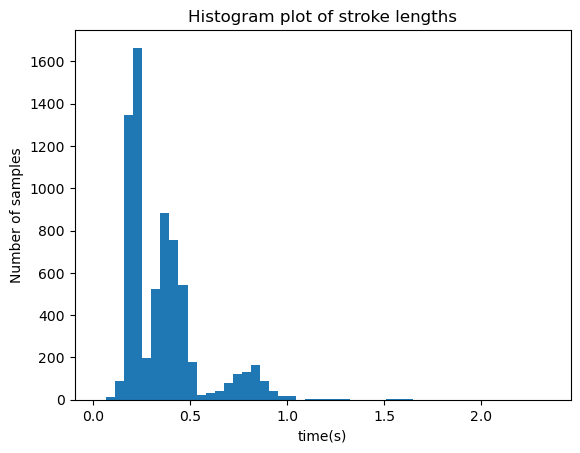

In [26]:
note = notes[3]
l = []
for note in notes:
    for name in list(classwise[note].keys()):
        l += classwise[note][name]
l = [len(mridangam_tracks[name].audio[0])/44100 for name in l]
plt.xlabel("time(s)")
plt.ylabel("Number of samples")
plt.title("Histogram plot of stroke lengths")
plt.hist(l, 50)

In [27]:
len([i for i in l if i >0.45])

1324

In [28]:
np.median(lens)

13803.0

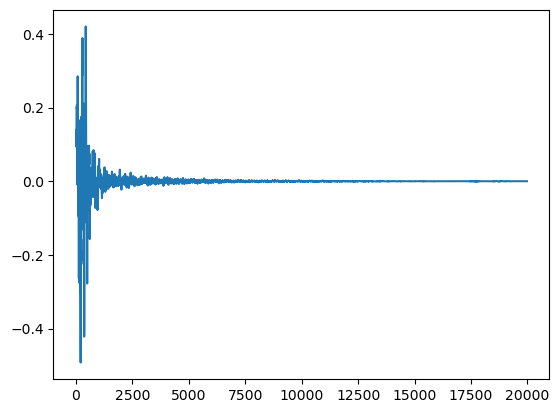

In [29]:
plt.plot(mridangam_tracks[classwise['E'][strokes[8]][19]].audio[0])

In [30]:
threshold = 0.03
beat_name = list(mridangam_tracks.keys())[0]
X = np.where(abs(mridangam_tracks[beat_name].audio[0])   >= threshold*(max(abs(mridangam_tracks[beat_name].audio[0]))))[0][-1]

In [31]:
np.zeros(100)+X

array([27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542., 27542., 27542., 27542., 27542.,
       27542., 27542., 27542., 27542.])

In [32]:
np.arange(10)/100

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

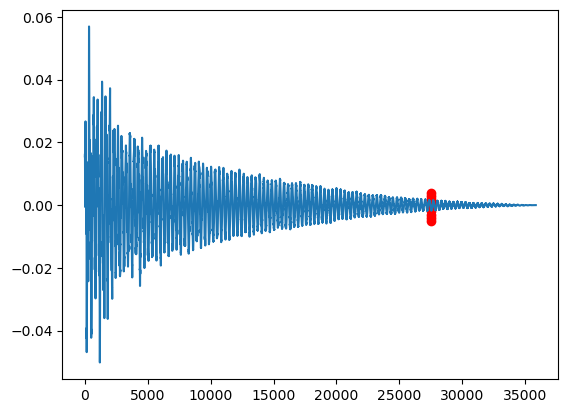

In [33]:

plt.plot(mridangam_tracks[beat_name].audio[0])
plt.scatter(np.zeros(10)+X, (np.arange(10)-5)/1000, color = 'red')

In [34]:
# def make_cepstrogram(audio):
#     return librosa.feature.mfcc(y=np.array(librosa.util.normalize(audio)), sr=44100, hop_length=128, n_mels = 128, fmax = 8000)

In [35]:
def make_sample(note, tracks = mridangam_tracks, mode = "train"):
    if mode == "train":
        if note == 'D':
            stroke_list = [2, 3, 4, 5, 11]
        else:
            stroke_list = [1,2, 3, 4, 5, 11]
    else:
        if note == 'D':
            stroke_list = [6, 7, 8, 9, 10, 11]
        else:
            stroke_list = [6, 7, 8, 9, 10, 11]
    time = 5
    limits = []
    arr, tot_len = [], 0
    threshold = 0.03
    frame = 0
    while time*44100-tot_len>=0.4*44100:
        stroke = random.choices(stroke_list, k = 1)[0]-1
        if stroke<10:
            beat_name = random.choices(classwise[note][strokes[stroke]])[0]
            X = np.where(abs(tracks[beat_name].audio[0])   >= threshold*(max(abs(tracks[beat_name].audio[0]))))[0][-1]
            y = make_spectrogram(tracks[beat_name].audio[0]).shape[1]
            limits.append([frame, frame + int(np.ceil(y*X/len(tracks[beat_name].audio[0]))), frame + y, stroke])
            frame += y
            arr += list(tracks[beat_name].audio[0])
        else:
            to_add = int(np.random.uniform(44100*0.15, 44100*0.2))
            arr += list(np.zeros(to_add))
            y = make_spectrogram(list(np.zeros(to_add))).shape[1]
            limits.append([frame, frame + y, frame + y, stroke])
            frame += y
        tot_len = len(arr)
    if len(arr)>time*44100:
        print("Recursive sequence correction")
        return make_sample(note, mode = mode)
    else:
        y = make_spectrogram(list(np.zeros(time*44100-len(arr)))).shape[1]
        limits.append([frame, min(int(np.ceil(time*44100/128)), frame + y), min(int(np.ceil(time*44100/128)), frame + y), 10])         #change 1723 if changing time
        arr += list(np.zeros(time*44100-len(arr)))
        
        target = np.zeros((11, int(np.ceil(time*44100/128)))  )                                               # change 1723 if changing time int(np.ceil(time*44100/128))
        
        for limit in limits:
            target[limit[3]][limit[0]:limit[1]] = 1
            target[10][limit[1]:limit[2]] = 1
        if note == 'D' and mode == 'train':
            stroke_list = [1, 2, 3, 4, 5, 11]
            
        return arr, target[[x-1 for x in stroke_list]]

In [36]:
example = make_sample('D', mode = "train")

In [37]:
len(example[0])

220500

In [38]:
# example = make_sample('D', mode = "test")



# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

# fig, (ax1, ax2) = plt.subplots(ncols=2)
# fig.subplots_adjust(wspace=0.01)

# sns.heatmap(example[1], cmap="hot", ax=ax1, cbar=False)
# sns.heatmap(example[2], cmap="hot", ax=ax2, cbar=False)

# ax2.yaxis.tick_right()

# fig.subplots_adjust(wspace=0.001)
# plt.show()

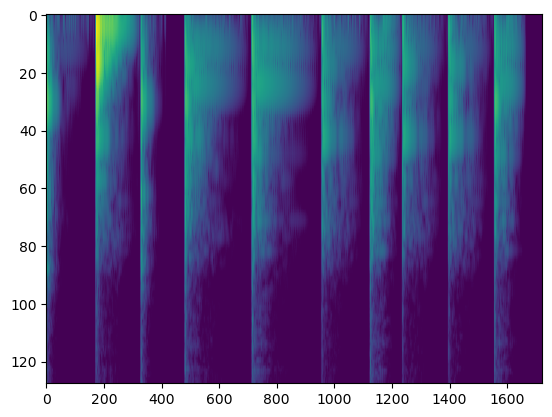

In [39]:
# plt.scatter(np.transpose(np.array(example[1]))[0] , np.transpose(np.array(example[1]))[1] , color='red', s = 100 )
plt.imshow(make_spectrogram(example[0]), aspect = 'auto')

In [40]:
a = np.random.normal(0, scale = 0.08, size = (len(example[0]))) + np.random.normal(0, scale = 0.08, size = (len(example[0])))

In [41]:
lst = librosa.istft(make_spectrogram(example[0]) , hop_length = 128)
ipd.Audio(a+example[0], rate = 44100)

In [42]:
len(lst)/len(example[0])

0.9996190476190476

In [43]:
np.min(a), np.max(a)

(-0.4997781623863314, 0.4917724198336403)

In [44]:
ipd.Audio(example[0], rate = 44100)

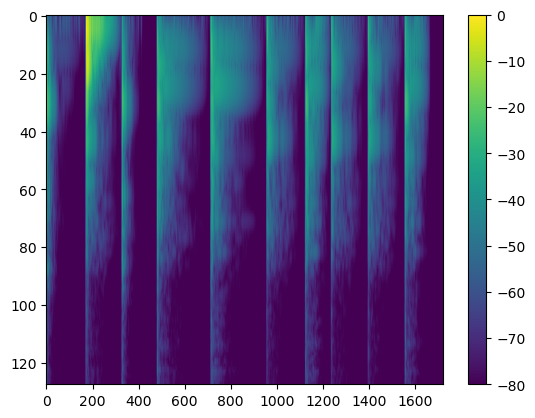

In [45]:
plt.imshow(make_spectrogram(example[0]), aspect = 'auto')
plt.colorbar()

In [46]:
ipd.Audio(example[0]+a, rate = 44100)

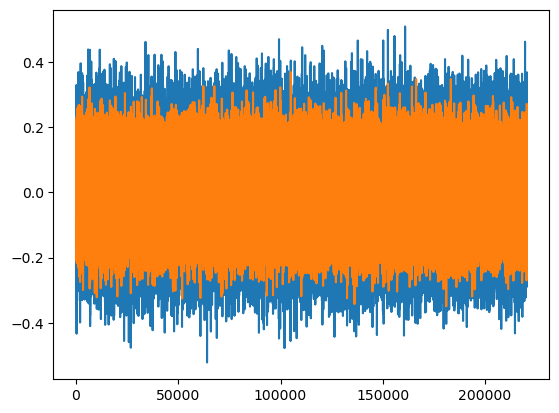

In [47]:
tmpx, tmpy = np.random.normal(0, scale = 0.08, size = (len(example[0]))) , np.random.normal(0, scale = 0.08, size = (len(example[0])))
plt.plot(tmpx+tmpy)
plt.plot(tmpy)

In [48]:
spectrogram = librosa.feature.mfcc(y=np.array(librosa.util.normalize(example[0])), sr=44100, hop_length=128, n_mels = 256, fmax = 10000)

In [49]:
type(example[0])

list

In [50]:
spectrogram1 = librosa.feature.melspectrogram(y=np.array(example[0]), sr=44100, n_mels=128,
                                   fmax=8000)

<AxesSubplot:>

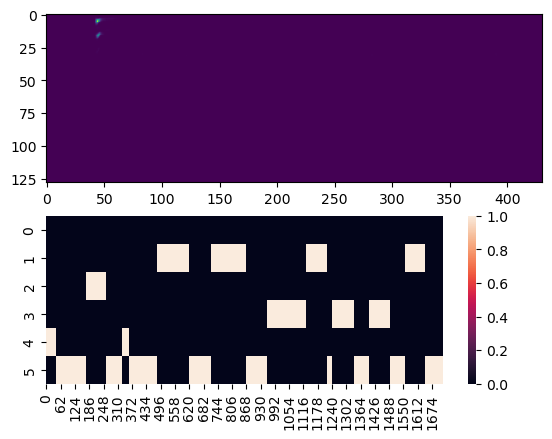

In [51]:
plt.subplot(211)
plt.imshow(spectrogram1, aspect = 'auto')
plt.subplot(212)
sns.heatmap(example[1])

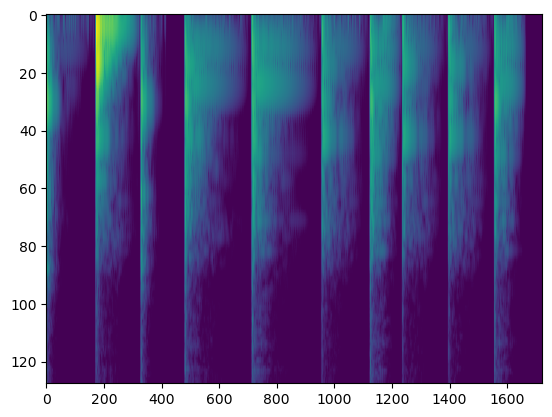

In [52]:
plt.imshow(make_spectrogram(example[0]), aspect = 'auto')

In [53]:
weights = np.zeros(11)
for i in range(100):
    if i%20 == 0:
        print(i)
    example = make_sample('D')
    for j in range(5):
        weights[j] += np.sum(example[1][j])

0
20
Recursive sequence correction
Recursive sequence correction
40
Recursive sequence correction
Recursive sequence correction
60
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction


KeyboardInterrupt: 

In [ ]:
s = np.sum(weights)

In [ ]:
weights = weights/s

In [ ]:
weights

In [ ]:
len(mridangam_tracks['228262'].audio[0])

In [ ]:
int(np.ceil(13318/128))

In [ ]:
ipd.Audio(example[0], rate=44100)

In [ ]:
for stroke in strokes:
    print(len(classwise['B'][stroke]))

In [ ]:
S = make_sample('B')

In [ ]:
make_spectrogram(S[0]).shape, S[1].shape

In [ ]:
plt.imshow(make_spectrogram(S[0]), aspect = 'auto')

In [ ]:
sns.heatmap(S[1])

In [54]:
samples = 200
for note in notes:
    print(f"{note} has started : ")
    for i in range(0, samples, 100):
        X, Xnoisy, Y = None, None, None
        for j in range(min(100, samples-i, 100)):
            if((i+j) %5 == 0):
                print(i+j)
            if note != 'D':
                example = make_sample(note, mode = "train")
            else:
                example = make_sample(note, mode = "train")
            if X is None:
                X = tf.expand_dims(make_spectrogram(example[0]), axis = 0)
                Xnoisy = tf.expand_dims(make_spectrogram(example[0] + np.random.normal(0, scale =np.random.randint(3, 8)/100 , size = (44100*5))), axis = 0)
                Y = tf.expand_dims(example[1], axis = 0)
            else:
                X = tf.concat((X, tf.expand_dims(make_spectrogram(example[0]), axis = 0)), axis = 0)
                Xnoisy = tf.concat((Xnoisy, tf.expand_dims(make_spectrogram(example[0]    +  np.random.normal(0, scale =np.random.randint(3, 8)/100 , size = (44100*5))  ), axis = 0)), axis = 0)
                Y = tf.concat((Y, tf.expand_dims(example[1], axis = 0)), axis = 0)
        os.chdir(r'D:\Project_Dataset\train\X')
        np.save(f'{note}{i//100}.npy', X)
        os.chdir(r'D:\Project_Dataset\train\Y')
        np.save(f'{note}{i//100}.npy', Y)
        os.chdir(r'D:\Project_Dataset\train\Xnoisy')
        np.save(f'{note}{i//100}.npy', Xnoisy)

B has started : 
0
Recursive sequence correction
5
Recursive sequence correction
10
15
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction
20
Recursive sequence correction
25
Recursive sequence correction
30
35
Recursive sequence correction
40
45
Recursive sequence correction
50
Recursive sequence correction
55
60
Recursive sequence correction
Recursive sequence correction
65
70
75
80
Recursive sequence correction
Recursive sequence correction
85
Recursive sequence correction
90
Recursive sequence correction
Recursive sequence correction
95
Recursive sequence correction
100
Recursive sequence correction
Recursive sequence correction
105
110
Recursive sequence correction
115
Recursive sequence correction
120
Recursive sequence correction
125
Recursive sequence correction
130
135
Recursive sequence correction
140
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction
145
Recursive sequence correction
Recursive seque

140
Recursive sequence correction
Recursive sequence correction
145
Recursive sequence correction
150
155
160
Recursive sequence correction
165
Recursive sequence correction
Recursive sequence correction
170
175
Recursive sequence correction
180
Recursive sequence correction
185
Recursive sequence correction
190
Recursive sequence correction
195
D# has started : 
0
Recursive sequence correction
Recursive sequence correction
5
Recursive sequence correction
Recursive sequence correction
10
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction
15
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction
20
25
Recursive sequence correction
30
Recursive sequence correction
Recursive sequence correction
35
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction
Recursive sequence correction
Recursive se

In [ ]:
plt.plot(np.random.normal(0, scale =np.random.randint(3, 8)/100 , size = (44100*5)))

In [ ]:
np.random.randint(3, 10)/100